In [1]:
%run imports.py

Files already downloaded and verified
Preparing data..
Files already downloaded and verified
GPU available:  True
OS:  win32


In [13]:
#bss=[64,128,256,512,1024]
bss=[32]
sch="plateau"
total_epochs=160
step=40

def train_plateau():
    for bs in bss:
        print("Training bs: " + str(bs))
        name="bs_"+str(bs) + "_sch_"+ sch
        save_folder=name+"/"+name

        net=models.resnet18(num_classes=10)
        criterion = nn.CrossEntropyLoss()
        # Observe that all parameters are being optimized
        optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)
        # Decay LR by a factor of 0.1 every 7 epochs
        # exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
        plateau_lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,patience=3,threshold=1e-3)
        
        model_actions.progressive_train_4(net,epochs=total_epochs,step=step,tr_bs=bs,save_folder=save_folder,criterion=criterion,scheduler=plateau_lr_scheduler)

In [14]:
az_manage_proc.run_and_delete(log.log_time,train_plateau)

Found existing instance, use it.
Training bs: 64
Training


Epoch: 1

Epoch: 2

Epoch: 3

Epoch: 4

Epoch: 5

Epoch: 6

Epoch: 7

Epoch: 8

Epoch: 9

Epoch: 10

Epoch: 11


Show Training graphs

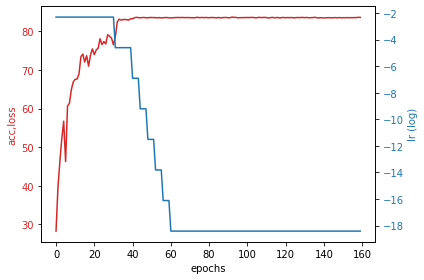

In [8]:

bs=1024
loaded=utils.load("bs_"+str(bs)+"_sch_plateau.json")

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('epochs')
ax1.set_ylabel('acc,loss', color=color)
ax1.plot(loaded["test_acc_v"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('lr (log)', color=color)  # we already handled the x-label with ax1
ax2.plot(np.log(loaded["current_lr_v"]), color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [6]:
bs=256
loaded=utils.load("bs_"+str(bs)+"_sch_plateau.json")